# 1) Hash table

- uklada prvky v **key-value** paroch
    - **key** - unikatna integer hodnota, ktora sa pouziva na indexovanie hodnoty/value
    - **value** - data/udaje/hodnoty, ktore su prepojene s **key**
- aplikacie:
    - pri konstantnom casovom vyhladavani a vkladani???
    - kryptografia
    - je pozadovane indexovanie udajov

## 1.1) Hashing (hash function) - posekanie

- **hashing** - proces pri ktorom sa v hash tabulke novy index vznikne pouzitim **key**. Prvok zodpovedajuci tomuto **key** je ulozeny v indexe.
- nech **k** je key a **h(x)** je hash f-cia. **h(k)** nam da novy index na ulozenie prvku spojeneho s **k** key.

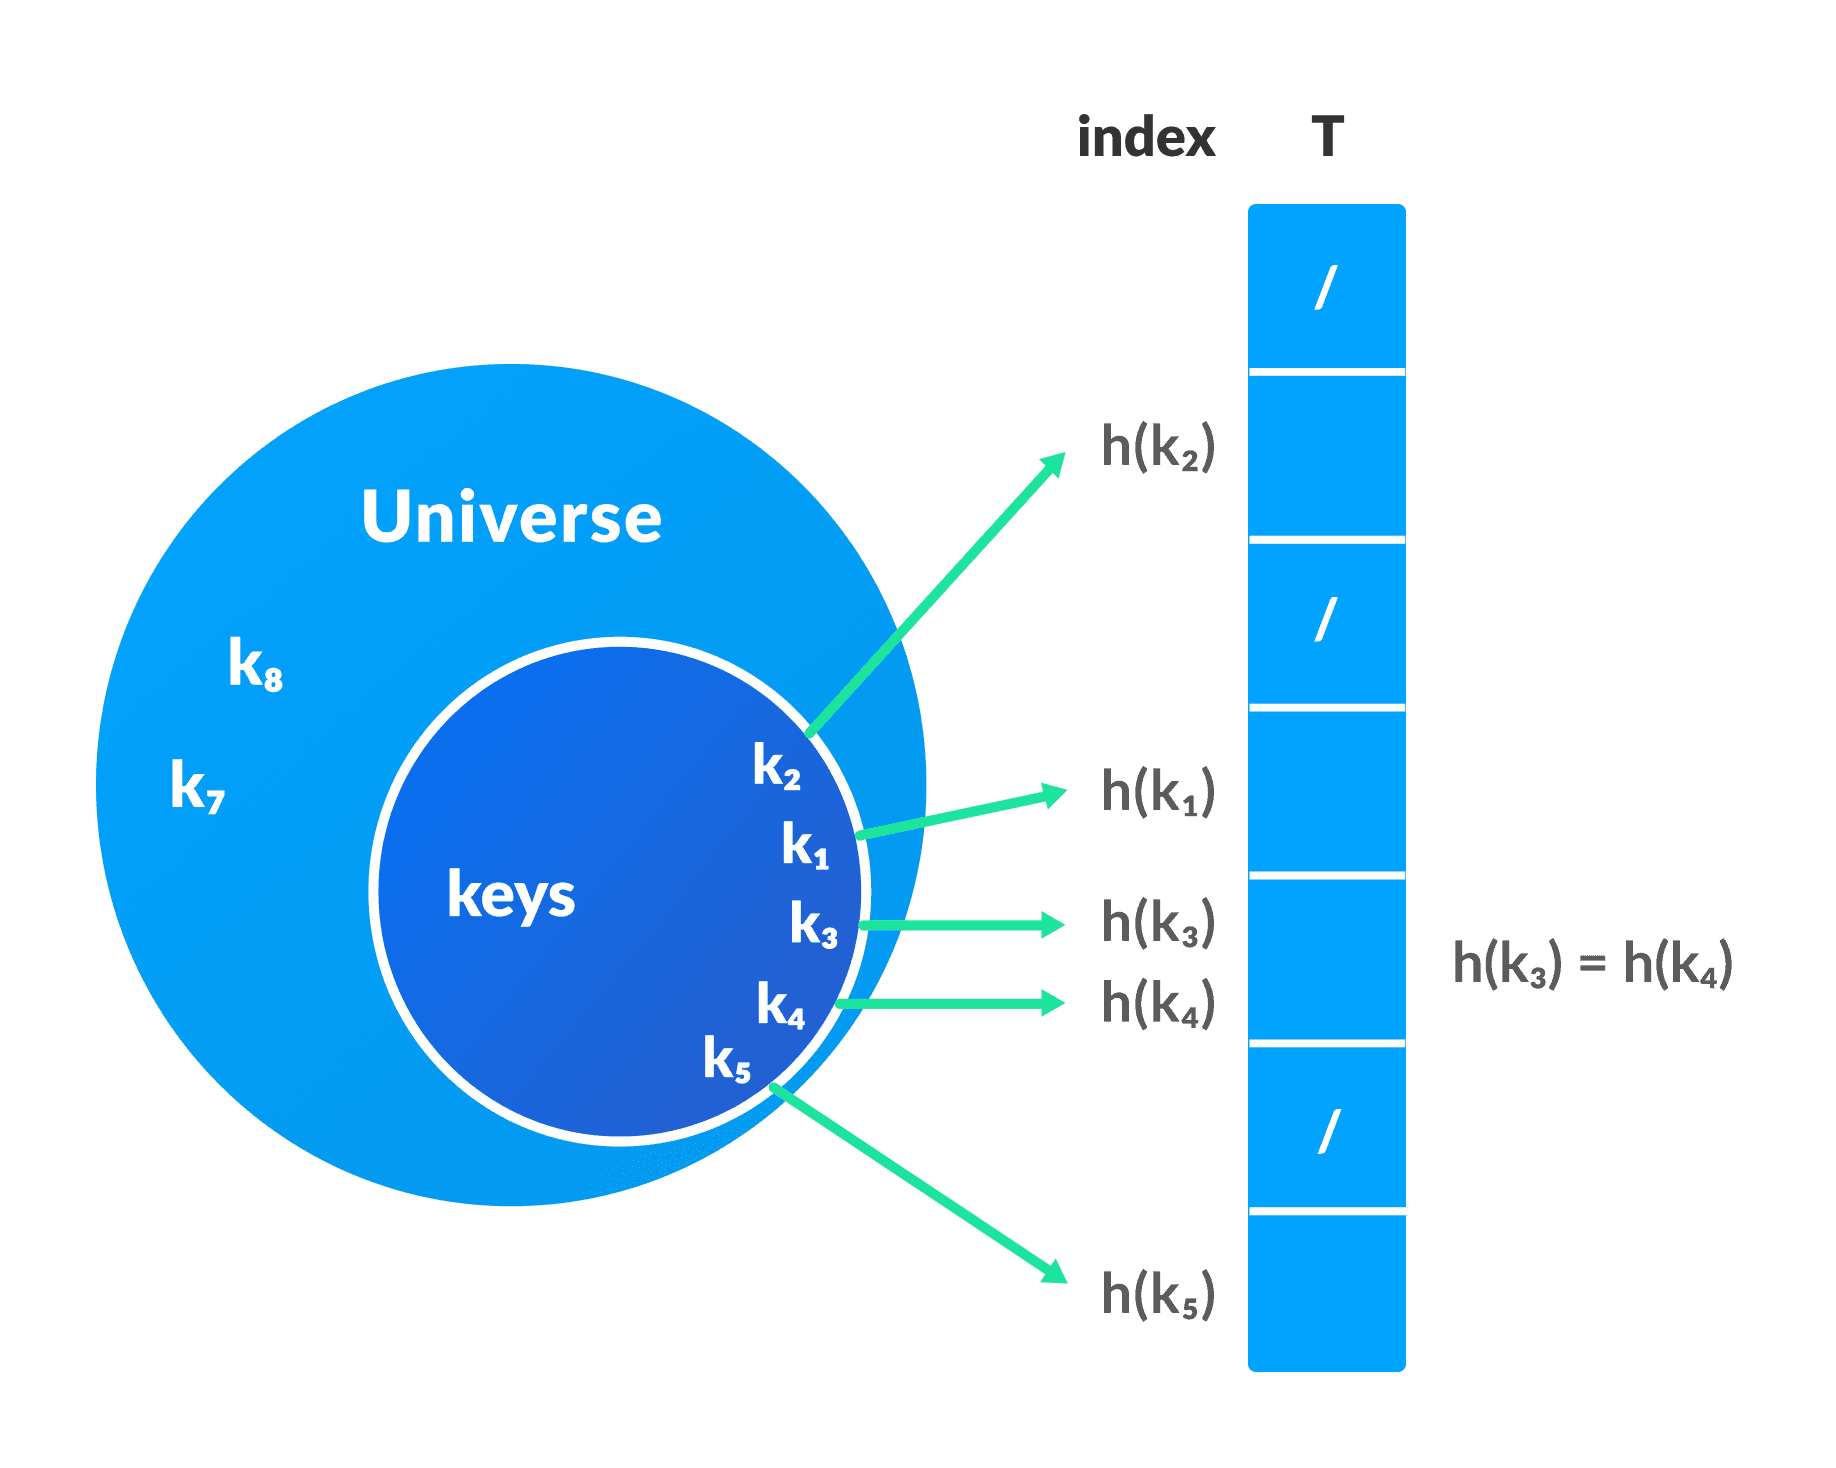

## 1.2) Hash collision

- ak hash f-cia vytvori ten isty index pre viacere kluce (keys)
- riesenie:
    - collision resolution by chaining (retazenim)
    - open addressing - linear, quadratic probing (testovanie/skumanie) and double hashing

### 1.2.1) Chaining

- ak hash f-cia vytvori ten isty index pre viacere kluce, tak tieto kluce su ulozene pod tym istym indexom pouzitim **doubly-linked list**
- ak `j` je slot pre viacere kluce/prvky, tak obsahuje pointer na hlavu (head) pola (list) prvkov. Ak nie je v poli ziaden prvok, tak `j` obsahuje `NIL`

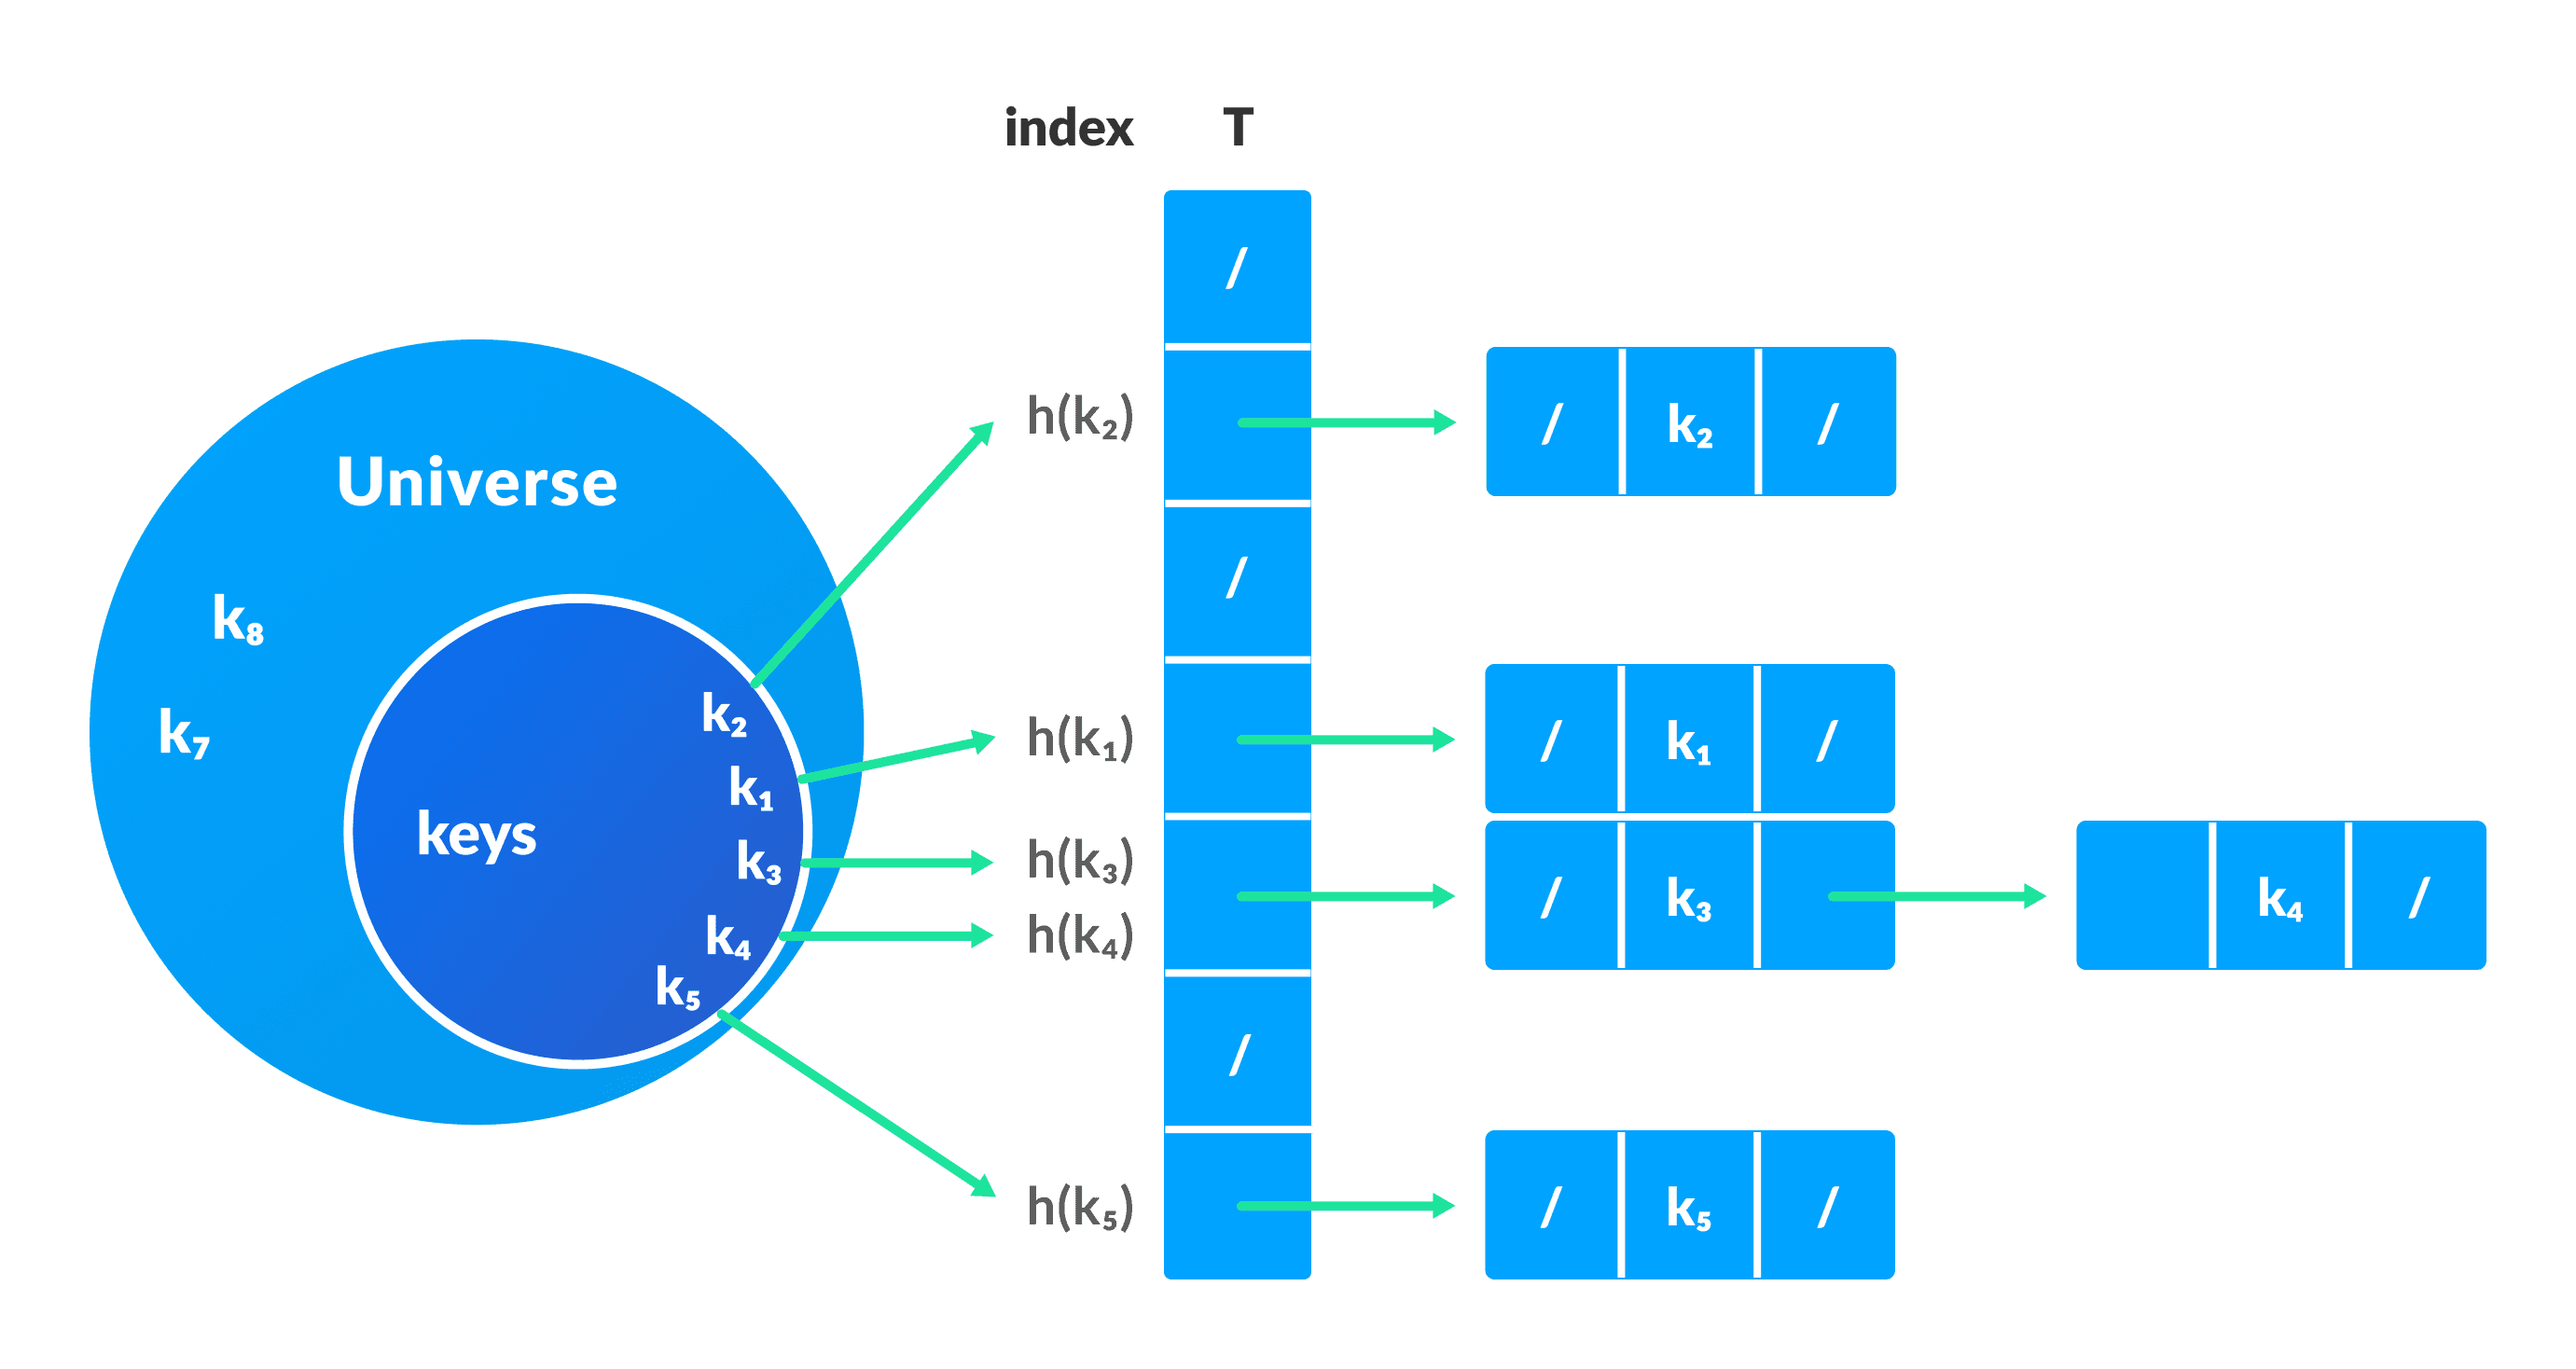

### 1.2.2) Open addressing

- narozdiel od retazenia, sa viacere prvky s rovnakym indexom neukladaju do toho isteho slotu pouzitim double-linked listu/pola.
- **linear probing**
    - kolizia sa riesi kontrolou nasledujuceho slotu
    - `h(k,i) = (h'(k)+i) mod m`
        - i  = {0,1,...}
        - h'(k) - nova hash funkcia
    - ak kolizia nastane na h(k,0), tak sa skontroluje nasledujuci slot h(k,1). Hodnota i sa zvysuje linearne.
    - problemom je, ze pri vkladani noveho prvku je potrebne prejst cele pole, co zvysuje casovu narocnost.
- **quadratic probing**
    - funguje podobne ako linear probing
    - vzdialenost medzi slotmi sa zvysuje pomocou rovnice:
    - `h(k, i) = (h'(k) + c1i + c2i2) mod m`
    - c1 a c2 - pomocne konstanty
    - i = {0,1...}
- **double hashing**
    - ak kolizia nastane po aplikovani hash f-cie, tak sa vypocita nova hash f-cia na najdenie dalsieho slotu
    - `h(k, i) = (h1(k) + ih2(k)) mod m`

## 1.3) Good hash functions

- dobra hash funkcia sa nesnazi zabranit kolizii ale snazi sa redukovat pocet kolizii
- metody:
    - **division method**
    - ak `k` je kluc/key a `m` je velkost hash tabulky, tak hash f-ciu `h()` vypocitame:
    - `h(k) = k mod m`
    - pr. m = 10, k = 112, tak h(k) = 112 mod 10 = 2
    - **multiplication method**
    - `h(k) = ⌊m(kA mod 1)⌋`
        - kA mod 1 - da zlomkovu (fractional) cast kA
        - ⌊ ⌋ - daju floor value
        - A - konstanta, hodnota medzi (0,1) ale optimalna hodnota (podla Knuth autora) je cca (√5-1)/2
    - **universal hashing**
    - hash f-cia je volena nahodne, nezavisle od klucov/keys

## 1.4) Working wiht hash table

In [ ]:
# vytvorim hash table s 10 prazdnymi listami (kazdy list je index na zabranenie kolizie)
# zabranenie kolizie pomocou retazenia???

hashTable = [[] for _ in range(0, 10)]  # list comprehension
print(hashTable)


# f-cia ne kontrolu prvocisla
def checkPrime(n):
    if n == 0 or n == 1:
        return 0
    for i in range(2, n // 2):
        if n % i == 0:
            return 0

    return 1


if checkPrime(3) == 1:
    print("n is prime")
else:
    print("not prime")


# f-cia na ziskanie prvocisla
def getPrime(n):
    if n % 2 == 0:  # ci je cislo parne
        n = n + 1  # spravim neparne
    while checkPrime(n) == 0:  # opakuj pokial nenajdem prvocislo
        # while not checkPrime(n) # len iny zapis, cize opakuje pokial je FALSE, resp. 0
        n += 2  # ostava a vytvara neparne cisla
    return n


print(getPrime(14))


# vytvorenie hash funkcie (division method h(k) = k mod m)
def hashFunction(key):
    capacity = getPrime(10)  # definujem velkost hash tabulky
    return key % capacity


# vkladanie udajov do hash tabulky
def insertData(key, data):
    index = hashFunction(key)
    # skontroluj ci kluc/key existuje v liste/poli a updatni ho, inac
    # pridaj udaje do tabulky
    found = False  # nastavim premennu na False
    for i, kv in enumerate(
        hashTable[index]
    ):  # enumerate mi vrati index a hodnotu, pr. (0,"apple")
        if kv[0] == key:
            hashTable[index][i] = (key, data)  # updatnem existujuci key-value par
            found = True
            break
    if not found:  # if found = False
        hashTable[index].append((key, data))  # pridaj nove key-value par hodnoty


# odstranenie udajov
def removeData(key):
    index = hashFunction(key)
    # odstranenie key-value paru ak existuje
    for i, kv in enumerate(hashTable[index]):
        if kv[0] == key:
            del hashTable[index][i]
            break


insertData(1052, "apple")
insertData(152, "orange")
insertData(255, "banana")
insertData(152, "zmena")
removeData(152)
print(hashTable)

[[], [], [], [], [], [], [], [], [], []]
n is prime
17
[[], [], [(255, 'banana')], [], [], [], [], [(1052, 'apple')], [], []]
